In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

In [16]:
#read in CSVs for city and ride sharing data
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [14]:
#city data check
city_data.isna().sum()
#city data contains no null/NA values
#data type check
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [15]:
#ride data check
ride_data.isna().sum()
#ride data contains no null/NA values
#data type check
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#unique values of type column
city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
#counts of each type of city
city_data["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [22]:
city_ride = pd.merge(city_data,ride_data,how="left",on=["city","city"])
city_ride.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2019-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2019-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2019-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2019-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2019-02-19 14:09:20,27.11,8690324801449


In [44]:
#Separate into city types
urban_cities = city_ride[city_ride["type"] == "Urban"]
suburban_cities = city_ride[city_ride["type"] == "Suburban"]
rural_cities = city_ride[city_ride["type"] == "Rural"]

In [52]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()
#Get number of rides for suburban cities
suburban_ride_count = suburban_cities.groupby(["city"]).count()['ride_id']
#Get number of rides for rural cities
rural_ride_count = rural_cities.groupby(["city"]).count()['ride_id']

In [54]:
#Get the average of fare for each city type
urban_fare_avg = urban_cities.groupby(['city']).mean()['fare']
suburban_fare_avg = suburban_cities.groupby(['city']).mean()['fare']
rural_fare_avg = rural_cities.groupby(['city']).mean()['fare']

In [57]:
#Get average number of drivers for each city type
urban_driver_avg = urban_cities.groupby(['city']).mean()['driver_count']
suburban_driver_avg = suburban_cities.groupby(['city']).mean()['driver_count']
rural_driver_avg = rural_cities.groupby(['city']).mean()['driver_count']

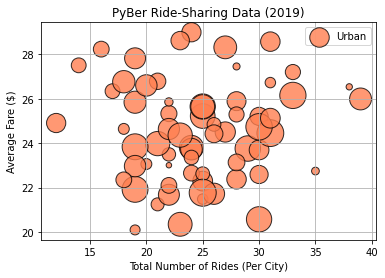

In [62]:
#Create Urban Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_fare_avg,
      s=10*urban_driver_avg, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

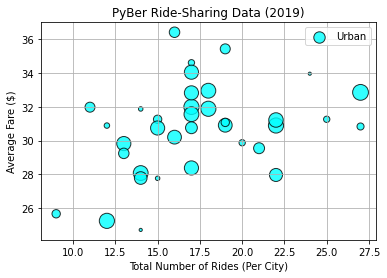

In [63]:
#Create Suburban Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count,
      suburban_fare_avg,
      s=10*suburban_driver_avg, c="cyan",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

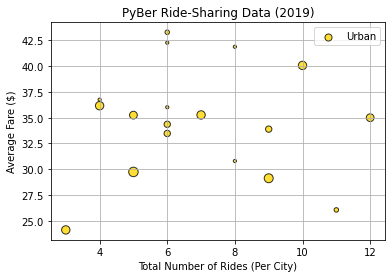

In [65]:
#Create Rural Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count,
      rural_fare_avg,
      s=10*rural_driver_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

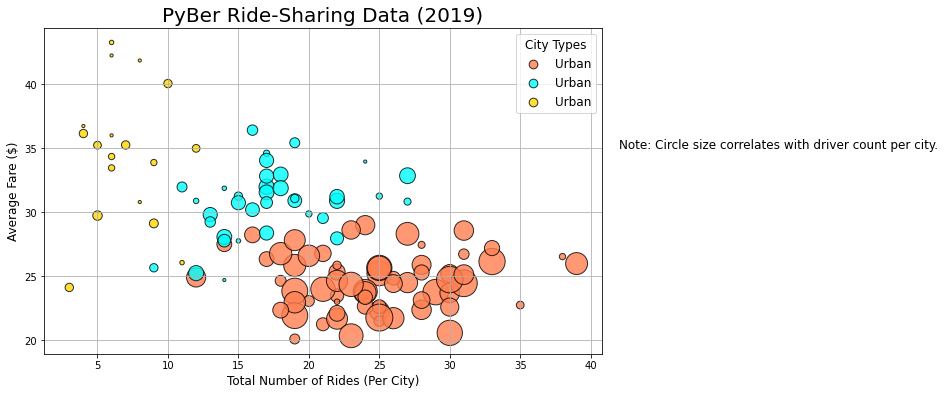

In [74]:
#Create Total Bubble Chart
plt.subplots(figsize=(10, 6))
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_fare_avg,
      s=10*urban_driver_avg, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#Create Suburban Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count,
      suburban_fare_avg,
      s=10*suburban_driver_avg, c="cyan",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#Create Rural Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count,
      rural_fare_avg,
      s=10*rural_driver_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Fig1.png")
